In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

LOADING DATA SET AND PREPROCESSING

In [708]:
df  = pd.read_csv(r"Electric_Vehicle_Population_Data.csv")
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,15.0,249905295,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1G1FY6S03L,Kitsap,Kingston,WA,98346.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,23.0,141133765,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303594e+10
2,KNDCE3LG9K,King,Seattle,WA,98125.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,46.0,3410074,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP8E,Thurston,Olympia,WA,98506.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,182436474,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10


In [709]:
df.isnull().sum()    #IT  CONTAIN NULL VALUES 

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [710]:
df.duplicated().sum()    # there is no duplicate value

0

In [738]:
df.describe()  #DISCRIPTION OF DATA WITH COLUMN

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Postal Regions
count,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000,239176.000000
mean,19.505197,263.445475,2021.461142,29.085326,94.228907,0.206969,0.904384,45.548972,769.102230,28.876764,2.236938
std,8.229523,144.110657,2.995676,13.056094,34.938025,0.405134,0.294064,83.419312,7089.785016,14.896632,2.897358
min,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,16.000000,140.000000,2020.000000,17.000000,87.000000,0.000000,1.000000,0.000000,0.000000,17.000000,0.000000
50%,16.000000,299.000000,2023.000000,39.000000,98.000000,0.000000,1.000000,0.000000,0.000000,32.000000,1.000000
75%,26.000000,376.000000,2024.000000,39.000000,101.000000,0.000000,1.000000,38.000000,0.000000,42.000000,3.000000
max,38.000000,484.000000,2026.000000,45.000000,170.000000,1.000000,1.000000,337.000000,845000.000000,49.000000,13.000000


In [712]:
# THIS COLUMN VIN(1-10) IT CONTAIN NO VALUE HENCE , IT IS BETTER TO DROP THIS COLUMN AS PER PREDICTION AND ANALYSIS 
df = df.drop(columns='VIN (1-10)')

In [713]:
df.isnull().sum()  #IT CONTAIN NULL VALUES 

County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [714]:
df = df.dropna()

In [715]:
df = df.drop(columns='State')    # it is clear that the state is washinghton so it is better to remove it 

In [716]:
df['Postal code'] = df['Postal Code'].astype(str)
df['Postal Regions'] = df['Postal code'].str[:3]


LABEL ENCODER TO CONVERT COLUMNS INTO NUMERIC FOR MACHINE LEARNING MODEL

In [718]:
encod = LabelEncoder()
df['Postal Regions'] = encod.fit_transform(df['Postal Regions'])
df['City'] =encod.fit_transform(df['City'])
df['County']  =encod.fit_transform(df['County'])
df['Make'] = encod.fit_transform(df['Make'])
df['Model'] = encod.fit_transform(df['Model'])

In [719]:
df = df.drop(columns ='Postal code')

In [720]:
df[['County' , 'City' , 'Postal Regions']].corr()  
#IT SHOWS COUNTY WITH CITY AS WEAK CO-RELATEION
# IT SHOWS CITY WITH COUNTY AND POSTAL REGION AS NO RELATATION
# POSTAL REGION DO NOT HAVE ANY NEGATIVE CO-RELATION WITH OTHERS

,County,City,Postal Regions
County,1.000000,-0.173393,0.021583
City,-0.173393,1.000000,0.202853
Postal Regions,0.021583,0.202853,1.000000


MAPPING THE CATEGORY IN A COLUMN WITH NUMBER

In [721]:
tt = {
    'Battery Electric Vehicle (BEV)':0,
    'Plug-in Hybrid Electric Vehicle (PHEV)':1

}
df['Electric Vehicle Type']  = df['Electric Vehicle Type'].map(tt)

In [722]:
dd = {
    'Eligibility unknown as battery range has not been researched' : 1,
    'Clean Alternative Fuel Vehicle Eligible' : 1,
    'Not eligible due to low battery range': 0
}
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(dd)

In [723]:
df = df.drop(columns = ['DOL Vehicle ID', 'Vehicle Location' , '2020 Census Tract' , 'Electric Utility','Postal Code'])  #SINCE UNIQUE VEHICLE ID WILL NOT CONTRIBUTE IN ML MODEL

TO CHECK OUTLIERS 

Text(0.5, 1.0, 'Analysis of outlier')

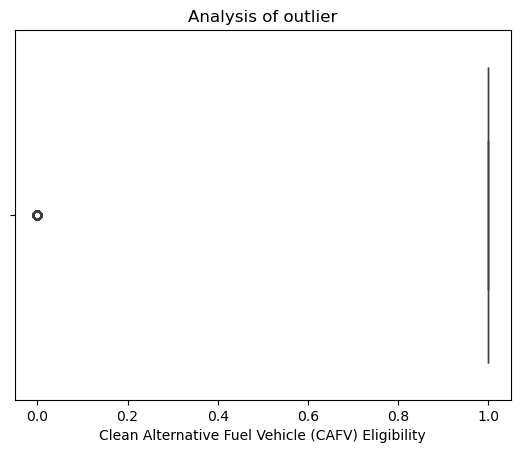

In [724]:
sns.boxplot(x = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("Analysis of outlier")

Text(0.5, 1.0, 'bocplot to check outlier in the df ')

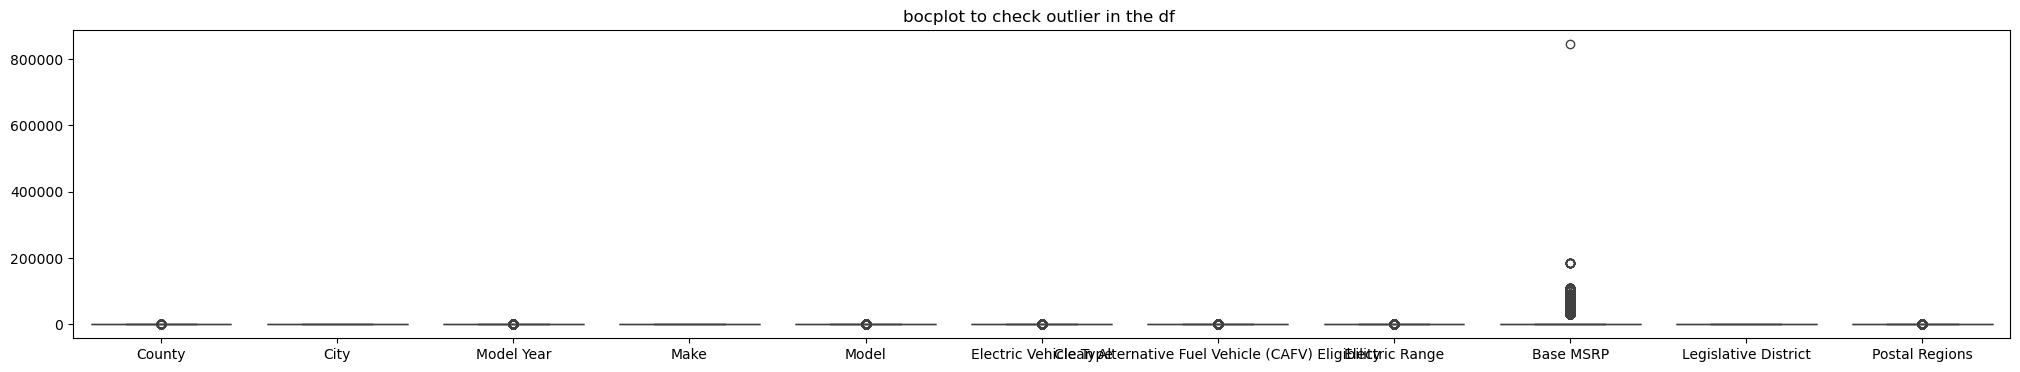

In [725]:
plt.figure(figsize = (25,4))
sns.boxplot(df)
plt.title("bocplot to check outlier in the df ")

In [726]:
df.corr()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Postal Regions
County,1.000000,-0.173393,-0.010388,-0.016625,-0.015175,-0.002555,0.000515,-0.006838,-0.001233,-0.098395,0.021583
City,-0.173393,1.000000,-0.005482,-0.043254,0.004135,0.047172,-0.028952,0.000807,-0.006163,0.005888,0.202853
Model Year,-0.010388,-0.005482,1.000000,0.075883,0.039921,-0.148099,0.168851,-0.532390,-0.227054,-0.012793,-0.044380
Make,-0.016625,-0.043254,0.075883,1.000000,0.216724,-0.328308,0.167580,0.046728,0.017745,0.038356,-0.061688
Model,-0.015175,0.004135,0.039921,0.216724,1.000000,0.308292,-0.061421,-0.073351,-0.005636,-0.007680,-0.005466
Electric Vehicle Type,-0.002555,0.047172,-0.148099,-0.328308,0.308292,1.000000,-0.636193,-0.087182,0.035472,-0.056396,0.084852
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000515,-0.028952,0.168851,0.167580,-0.061421,-0.636193,1.000000,0.097623,-0.076472,0.035605,-0.057918
Electric Range,-0.006838,0.000807,-0.532390,0.046728,-0.073351,-0.087182,0.097623,1.000000,0.116458,0.015603,0.012867
Base MSRP,-0.001233,-0.006163,-0.227054,0.017745,-0.005636,0.035472,-0.076472,0.116458,1.000000,0.009744,-0.002623
Legislative District,-0.098395,0.005888,-0.012793,0.038356,-0.007680,-0.056396,0.035605,0.015603,0.009744,1.000000,-0.408145


Text(0.5, 14.722222222222216, 'heatmap of dataset')

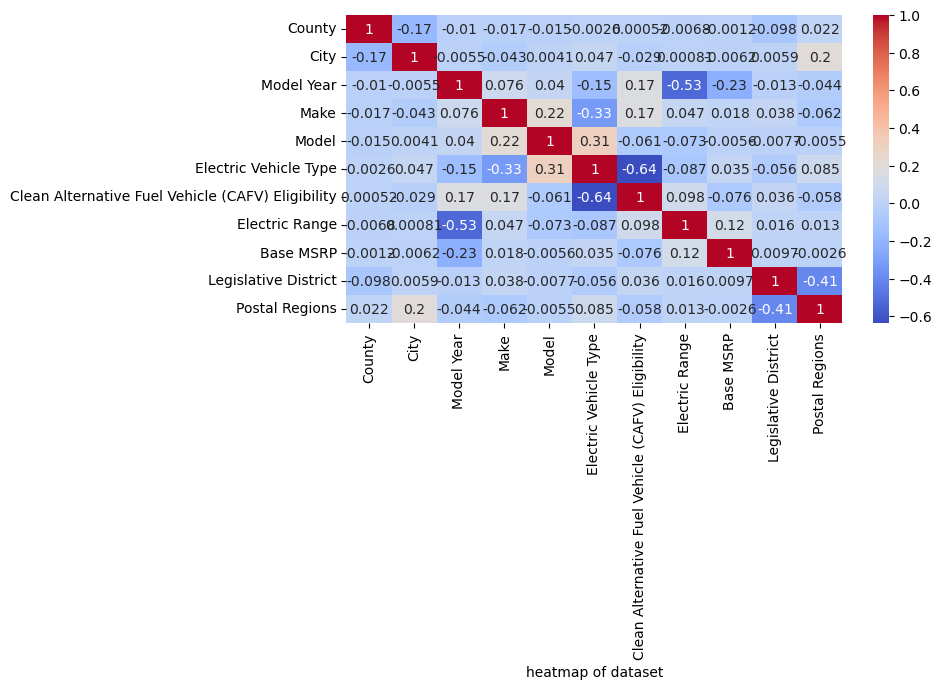

In [727]:
plt.figure(figsize =(8,4))
sns.heatmap(df.corr() , annot  = True , cmap  = 'coolwarm')
plt.xlabel("heatmap of dataset")

CHECKING BALANCE OF DATA/TARGET VALUE TO BUILD MACHINE LEARNING MODEL ON IT 

In [728]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
1    216307
0     22869
Name: count, dtype: int64

THE RATIO OF DATASET VARIES AND IT MAY SHOW CERTAIN BIASED PREDICTION, HENCE SMOTE IS REQUIRED IN THIS

In [729]:
X = df.drop(['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis = 1)
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size=0.2, random_state=42)

XGBOOST MACHINE LEARNING MODEL

In [730]:
xgb = XGBClassifier(use_label_encoder = False , eval_matrix  = 'logloss')
xgb.fit(X_train , y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test , y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4604
           1       1.00      1.00      1.00     43232

    accuracy                           1.00     47836
   macro avg       1.00      1.00      1.00     47836
weighted avg       1.00      1.00      1.00     47836



RANDOM FOREST CLASSIFIER

In [731]:
clssf = RandomForestClassifier()
clssf.fit(X_train , y_train)

RandomForestClassifier()

In [732]:
cls_pred = clssf.predict(X_test)
print(confusion_matrix(y_test , cls_pred))

[[ 4604     0]
 [    0 43232]]


In [733]:
print(classification_report(y_test , cls_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4604
           1       1.00      1.00      1.00     43232

    accuracy                           1.00     47836
   macro avg       1.00      1.00      1.00     47836
weighted avg       1.00      1.00      1.00     47836



In [734]:
print(accuracy_score(y_test , cls_pred))

1.0


In [735]:
scores = cross_val_score(clssf, X, y, cv=5)
print(scores)
print("Average CV score:", scores.mean())


[1. 1. 1. 1. 1.]
Average CV score: 1.0


FEATURE IMPORTANCE IN ORDER TO CHECK THE PREDICTION AND RELIABILITY

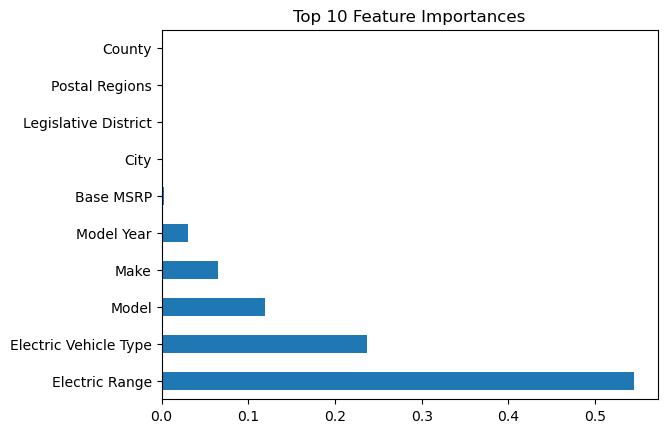

In [736]:
importances = pd.Series(clssf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


Text(0.5, 1.0, 'it contain electric range with its two value 0 and 1 in boxplot')

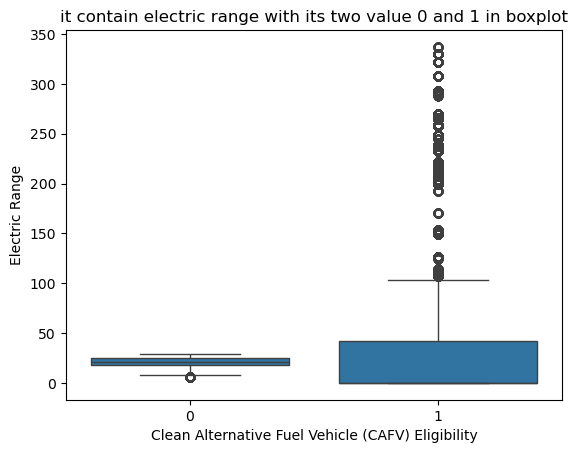

In [737]:
sns.boxplot(x=y, y=X['Electric Range'])
plt.title("it contain electric range with its two value 0 and 1 in boxplot")
